# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [58]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.dummy import DummyClassifier
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [29]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective of the task is to develop a predictive model for a Portuguese banking institution to determine whether a client will subscribe to a term deposit based on various socio-economic, demographic, and campaign-related features.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [31]:
# drop 'duration' column as it is not needed for prediction
data = data.drop(columns=['duration'])

In [32]:
# encode categorical features
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [33]:
# define input and output variables
X = data.drop(columns=['y'])
y = data['y']

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
# standardize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [36]:
# establish a baseline using a Dummy Classifier
dummy_clf = DummyClassifier(strategy='most_frequent')
dummy_clf.fit(X_train, y_train)
y_pred_dummy = dummy_clf.predict(X_test)

In [37]:
print("Baseline Model: Dummy Classifier")
print("Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))
print("Classification Report:\n", classification_report(y_test, y_pred_dummy, zero_division=1))

Baseline Model: Dummy Classifier
Accuracy: 0.8875940762320952
Confusion Matrix:
 [[10968     0]
 [ 1389     0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     10968
           1       1.00      0.00      0.00      1389

    accuracy                           0.89     12357
   macro avg       0.94      0.50      0.47     12357
weighted avg       0.90      0.89      0.83     12357



### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [38]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

### Problem 9: Score the Model

What is the accuracy of your model?

In [39]:
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Accuracy:", accuracy_log_reg)

Accuracy: 0.9001375738447843


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [40]:
# initialize classifiers
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC()

In [41]:
# train and evaluate basic models
models = {
    'Dummy Classifier': dummy_clf,
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Support Vector Machine': svm
}

results = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    results.append([model_name, train_time, train_accuracy, test_accuracy])

In [42]:
# resulting dataframe
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy'])
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy
0        Dummy Classifier    0.001573        0.887239       0.887594
1     K-Nearest Neighbors    0.004070        0.913253       0.891721
2     Logistic Regression    0.084676        0.900246       0.900138
3           Decision Tree    0.125742        0.995595       0.837258
4  Support Vector Machine   12.130618        0.904825       0.900785


- SVM achieved the highest test accuracy of 90.08%, indicating that it generalizes well to unseen data. However, it took significantly longer to train (12.13 seconds), making it the slowest model to train.
- Logistic Regression follows closely with a test accuracy of 90.01% and much faster training time (0.08 seconds).
- KNN performed well with a test Accuracy of 89.17%, which is decent but lower than SVM and Logistic Regression.
- The Decision Tree had the highest train accuracy at 99.56%, but its test accuracy dropped to 83.73%, suggesting significant overfitting.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

Let's do more feature exploration and engineering.

In [43]:
# checking for missing values
print("Missing values per column:\n", data.isnull().sum())

Missing values per column:
 age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


Great! No missing data.

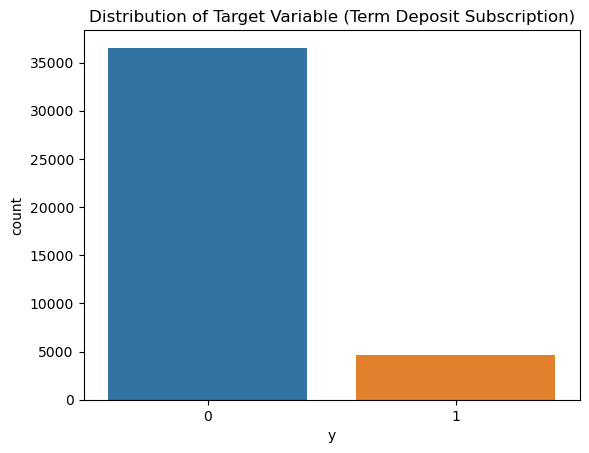

In [46]:
# explore the distribution of the target variable
sns.countplot(x='y', data=data)
plt.title('Distribution of Target Variable (Term Deposit Subscription)')
plt.show()

The plot shows a significant imbalance between the two classes: the number of clients who did not subscribe to a term deposit is much larger compared to those who did subscribe.

This can lead to a bias where the model favors the majority class, resulting in poor performance in predicting the minority class (subscribers). So we should focus on evaluating additional metrics like precision, recall, and the F1-score rather than just accuracy.


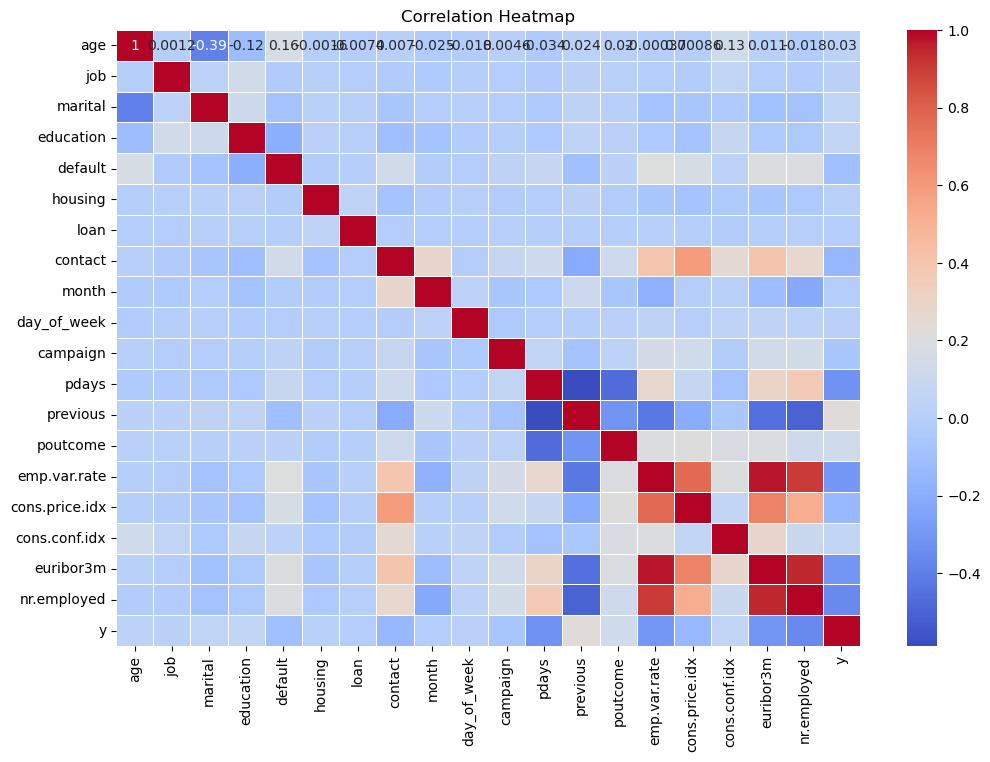

In [47]:
# exploring feature correlations
corr_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Let's drop features that may not add significant value or introduce redundancy:
- 'pdays': a value of 999 indicates the client was not previously contacted, making it redundant
- 'default': many values are 'unknown'
- 'day_of_week': shows almost no correlation with y
- 'contact': shows almost no correlation with y
- 'emp.var.rate', 'euribor3m', 'nr.employed': these are highly correlated, which can introduce multicollinearity. Dropping 'nr.employed' to reduce multicollinearity.

In [48]:
features_to_drop = ['pdays', 'default', 'day_of_week', 'nr.employed', 'contact']
data = data.drop(columns=features_to_drop)

Time to do hyperparameter tuning and grid_search.

In [49]:
# encode categorical features
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [50]:
# define input and output variables
X = data.drop(columns=['y'])
y = data['y']

In [51]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
# standardize the numeric features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# initialize classifiers
knn = KNeighborsClassifier()
log_reg = LogisticRegression(max_iter=1000)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC()

Let's use F1 as scoring, as we have a binary classification where both false positives and false negatives are critical.

In [86]:
# hyperparameter tuning using GridSearchCV
param_grid_knn = {'n_neighbors': [3, 5, 7, 9]}
grid_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='f1')
grid_knn.fit(X_train, y_train)

param_grid_svm = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
grid_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='f1')
grid_svm.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='f1')

In [87]:
print(f"Best parameters for K-Nearest Neighbors: {grid_knn.best_params_}")

Best parameters for K-Nearest Neighbors: {'n_neighbors': 5}


In [88]:
print(f"Best parameters for Support Vector Machine: {grid_svm.best_params_}")

Best parameters for Support Vector Machine: {'C': 10, 'kernel': 'rbf'}


In [89]:
# fit models, calculate metrics
models = {'K-Nearest Neighbors': grid_knn, 'Logistic Regression': log_reg, 'Decision Tree': decision_tree, 'Support Vector Machine': grid_svm}
results = []

for model_name, model in models.items():
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    train_accuracy = accuracy_score(y_train, model.predict(X_train))
    y_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred, zero_division=1)
    f1 = f1_score(y_test, y_pred, zero_division=1)
    results.append([model_name, train_time, train_accuracy, test_accuracy, precision, recall, f1])

In [90]:
# resulting dataframe
results_df = pd.DataFrame(results, columns=['Model', 'Train Time', 'Train Accuracy', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

                    Model  Train Time  Train Accuracy  Test Accuracy  \
0     K-Nearest Neighbors    5.156622        0.911345       0.888241   
1     Logistic Regression    0.049851        0.899379       0.899166   
2           Decision Tree    0.105141        0.993965       0.836125   
3  Support Vector Machine  253.152747        0.914849       0.893987   

   Precision    Recall  F1 Score  
0   0.506061  0.240461  0.326013  
1   0.684755  0.190785  0.298423  
2   0.295892  0.331893  0.312861  
3   0.577299  0.212383  0.310526  


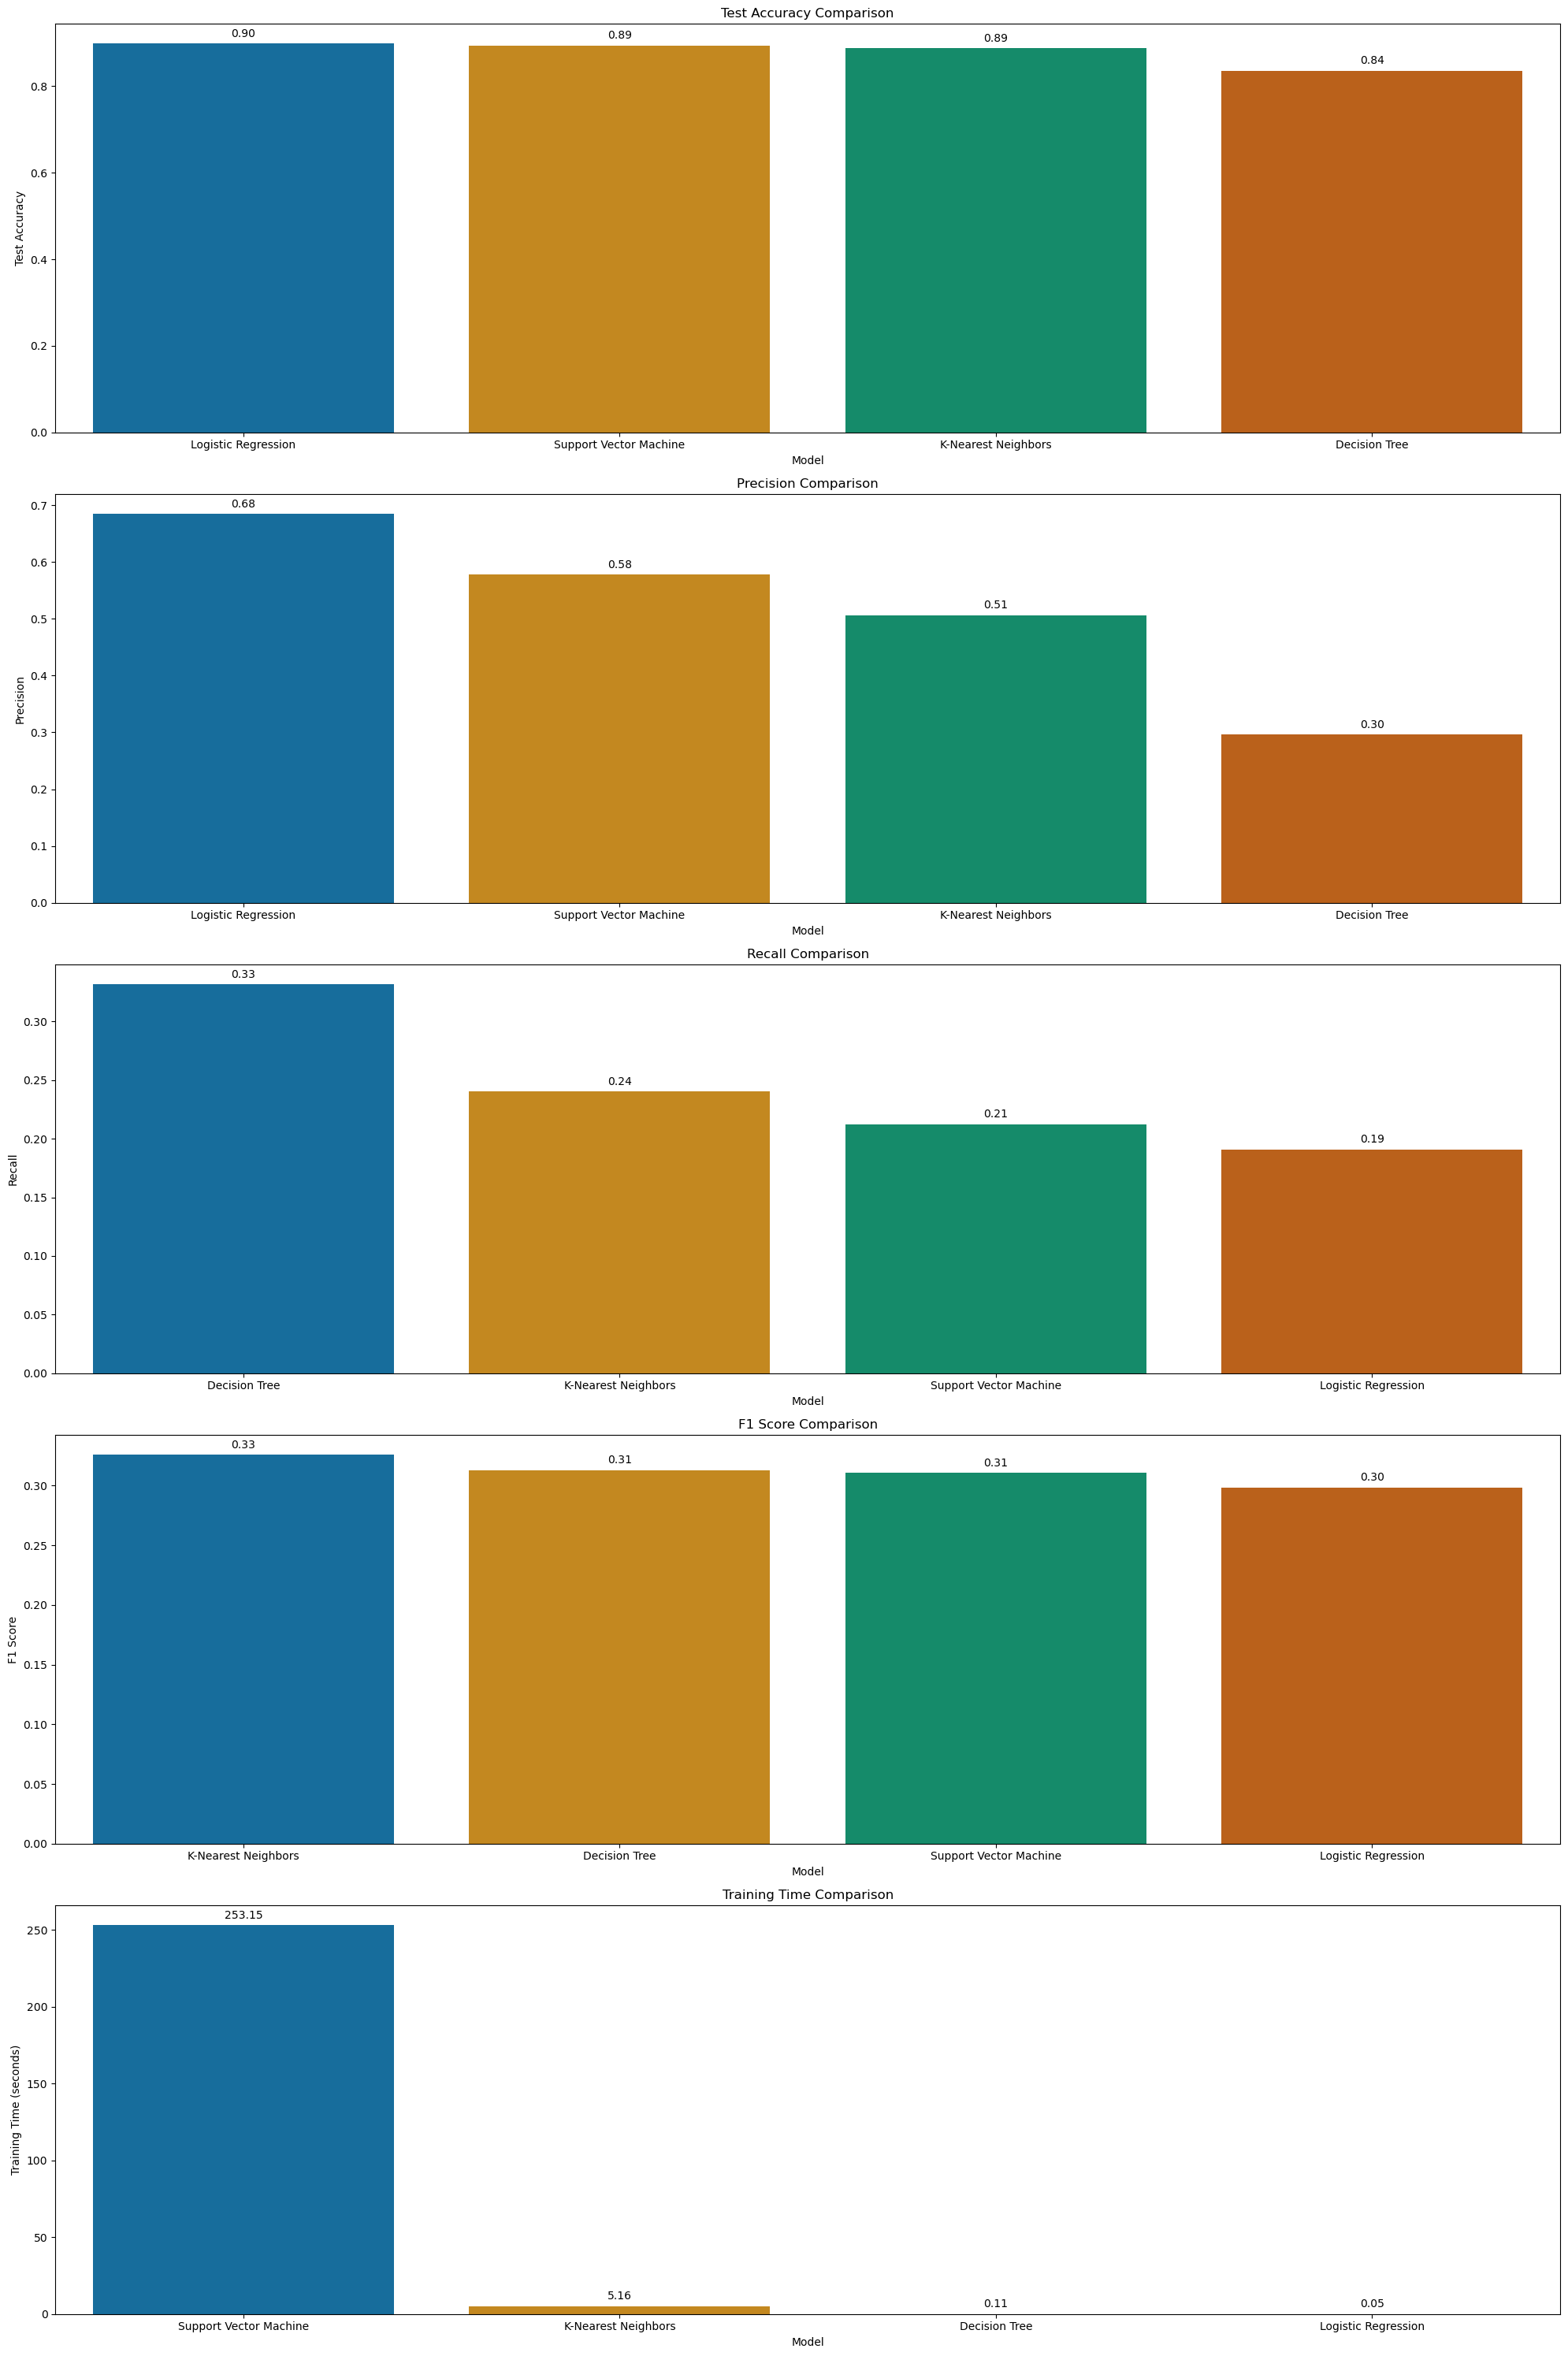

In [94]:
# assign colors to models
colors = sns.color_palette('colorblind', len(models))

# visualize model performance
plt.figure(figsize=(20, 30))

# test Accuracy
results_df_sorted = results_df.sort_values(by='Test Accuracy', ascending=False)
plt.subplot(5, 1, 1)
ax = sns.barplot(x='Model', y='Test Accuracy', data=results_df_sorted, palette=colors)
plt.title('Test Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Test Accuracy')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# precision
results_df_sorted = results_df.sort_values(by='Precision', ascending=False)
plt.subplot(5, 1, 2)
ax = sns.barplot(x='Model', y='Precision', data=results_df_sorted, palette=colors)
plt.title('Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# recall
results_df_sorted = results_df.sort_values(by='Recall', ascending=False)
plt.subplot(5, 1, 3)
ax = sns.barplot(x='Model', y='Recall', data=results_df_sorted, palette=colors)
plt.title('Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# F1 Score
results_df_sorted = results_df.sort_values(by='F1 Score', ascending=False)
plt.subplot(5, 1, 4)
ax = sns.barplot(x='Model', y='F1 Score', data=results_df_sorted, palette=colors)
plt.title('F1 Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1 Score')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

# train Time
results_df_sorted = results_df.sort_values(by='Train Time', ascending=False)
plt.subplot(5, 1, 5)
ax = sns.barplot(x='Model', y='Train Time', data=results_df_sorted, palette=colors)
plt.title('Training Time Comparison')
plt.xlabel('Model')
plt.ylabel('Training Time (seconds)')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 9), textcoords='offset points')

plt.tight_layout()
plt.show()